# Exploring data

Prior to doing any sort of machine learning, we need to understand our data. This can mean ensuring that

- we know how to combine multiple data sources if we need to
- the columns are what we think they are
- the column types are correct
- that we are aware of missing values or extreme values
- that we are aware of the statistical **distribution** of the columns (**univariate** analysis)
- that we are aware of how the columns in the data are related to each other (**bivariate or multivariate relationships**)

We commonly refer to the above tasks and other similar ones as **EDA (exploratory data analysis)** and it is a very important task in data science, because it can guide us in how we need to process the data in preparation for modeling and what kinds of algorithms or modeling strategies the data lends itself to.

Let's now read some data and start exploring it.

In [25]:
import pandas as pd

cars = pd.read_csv("../Data/cars.csv")
cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Notice what happens if we say `headers = None`:

In [23]:
###Just means that the data does not have a header, basically will consider the first row as data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html - documentation for all of the different ways you can take a look at the command

cars = pd.read_csv("../Data/cars.csv", header = None)
cars.head()

,0,1,2,3,4,5,6
0,buying,maint,doors,persons,lug_boot,safety,evaluation
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


In [72]:
###Object means something that is categorical or it is a mix, something it cannot determine

###Look at doors - has a string/text and then numbers, csv tries to determine and if it cannot it pumps it to an object

cars.dtypes

buying         object
maintenance    object
num_doors      object
num_persons    object
lug_boot       object
safety         object
evaluation     object
dtype: object

One very common task with data is to **subset** the data, also called **slicing** or **filtering**. We can subset data by rows, by columns, or both. We can subset data using numeric indices (positions), or using some kind of conditional logic. If we subset data using numeric indices, we need to remember that **in Python indexing starts at 0**, not at 1.

In [73]:
cars = pd.read_csv("../Data/cars.csv")
cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Let's start by pulling some basic information about our data.

In [74]:
cars.shape # number of rows and columns

(1728, 7)

In [75]:
###Even though the datatypes look good in the head, they are showing up as object which means there is something fishy in the data - doors should be numerical...etc.

#When you look at describe you can see that there is text in the data as well

cars.dtypes # prints column types



buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
evaluation    object
dtype: object

In [76]:
cars.columns # column names

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'evaluation'],
      dtype='object')

In [77]:
cars.index # row indexes

RangeIndex(start=0, stop=1728, step=1)

Let's get some basic summary statistics about the columns in the data.

In [81]:
###If some have more freq than others it means that it is missing data

cars.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,4,small,med,unacc
freq,432,432,432,576,576,576,1210


In [82]:
###Can also do this

cars.doors.describe()

count     1728
unique       4
top          3
freq       432
Name: doors, dtype: object

Let's see how we can rename the columns in our data.

In [83]:
new_col_names = ["buying", "maintenance", "num_doors", "num_persons", "lug_boot", "safety", "evaluation"]
cars.columns = new_col_names
cars.head()

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Exercise (2 minutes)

There's another way we can rename columns by using the `rename` method. Look at the documentation for it and write a line of code that renames the `evaluation` and `safety` columns to `eval` and `safe` respectively.

In [84]:
###ASK about inplace=True or not on this one
cars.rename(columns={"evaluation":"eval", "safety":"safe"})


###default is inplace = False - doesnt change column names unless you state, will not rename in original dataframe

###Nice to keep original data just for comparison just to see what it looks like -- use inplace = True to change it

,buying,maintenance,num_doors,num_persons,lug_boot,safe,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [86]:
cars.columns

Index(['buying', 'maintenance', 'num_doors', 'num_persons', 'lug_boot',
       'safety', 'evaluation'],
      dtype='object')

You should not be surprised to find out that there is usually more than one way of doing things when it comes to many of the things we learn it this course. As much as possible, when you try to do something, it's good to first find out if `pandas` (or other libraries) has a method for it. It can be fun and educational to do things from scratch from time to time, but generally we want to keep up with the functionality that various data science libraries have and use them to make our lives easier.

### End of exercise

We use the `iloc` method to subset data by its index or position (named index).

In [89]:
###A good way to look at initial data but can get confusing as it is tricky to manipulate the data

cars.iloc[4, 2] # show the 5th row, 3rd colum

'2'

In [88]:
###Returned the column names as well, can still use them as part of or as a seperate dataframe

cars.iloc[1:5, 1:3] # 2nd through 5th row, 2nd and 3rd column

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Subsetting columns of the data using `iloc` is **not recommended**, because it makes the code hard to understand and because the position of a column in the data can change, which would break our code. It's much more common to subset columns using their names instead of their positions. For that we can use the `loc` method.

In [91]:
###Can use column names as well on this part

cars.loc[1:5, ["maintenance", "num_doors"]]

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2
5,vhigh,2


Note how `loc` and `iloc` are methods, but their arguments are specified inside square brackets instead of parenthesis. This is done for historical reasons. Usually, methods are like functions and their arguments are inside parenthesis.

There's another way we can subset the data by using the `filter` method instead of `loc` or `iloc`. In the case of filter, we need to specify the `axis` argument to say if the filter applies to rows (`axis = 0`) or columns (`axis = 1`).

In [38]:
###Specify the range on the columns and then filter through the rows

###Just need to make sure you specify axis when you are working with filter

cars.filter(items = range(1, 5), axis = 0).filter(items = ["maintenance", "num_doors"], axis = 1)

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Note from the below example that `filter` seems much more verbose and un-intuitive than using `loc` or `iloc`, but it has its advantages.

### Exercise (3 minutes)

- Let's say we want to show the columns in the data that start with `num_`. Write a program that uses `loc` to do this.

In [96]:
#https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-whose-names-start-with-x
cars.loc[:, cars.columns.str.startswith("num_")]


,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


In [97]:
cars.columns.str.startswith('num_')

array([False, False,  True,  True, False, False, False])

In [49]:
cars.loc[:3, cars.columns.str.startswith('m')]

,maintenance
0,vhigh
1,vhigh
2,vhigh
3,vhigh


In [94]:
cars[cars['num_doors'].str.contains('num_')]

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation


- Can you use the below snippet to simplify your code?

In [46]:
cars.columns.str.startswith("num_")

array([False, False,  True,  True, False, False, False])

- Now check the documentation for `filter` and use it to do the same.

In [98]:
#https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

###Need to specify the column in there for sure

cars.filter(regex='num_',axis=1)

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


In [99]:
###If you have a tricky string of trying to extract zip codes or something along those lines

###Use regex if you have lots of mixed data, messy and unstructured

cars.filter(regex='^num_*', axis=1)

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


### End of exercise

A very common thing to do when working with tabular data is to point to a single column of it. For example, we may want to

- change the type of a single column
- do a log transformation on a single column
- create a new column that is the sum of two other columns

and so on. So based on what we learned so far, we know that we can use `loc` to point to a single column.

In [52]:
cars.loc[:, "num_persons"].head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object

But because pointing to single columns is such a common thing to do, `pandas` offers a shortcut for doing this. Instead of typing `data.loc[:, "x"]` to reference column `x` in `data`, we can use `data["x"]` or `data.x`. Note that the second option is only possible if the column name does NOT contain any space.

In [100]:
cars["num_persons"].head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object

In [102]:
###Second set of square brackets adds a nicer formatting finish for the table

cars[["num_persons"]].head()

,num_persons
0,2
1,2
2,2
3,2
4,2


In [103]:
cars.num_persons.head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object

### Exercise (7 minutes)

Notice that the type of `num_persons` is `object`. Why did that happen? It looks like it should be of type `integer` and not `object` (which is more appropriate for categorical data). 

- List the unique values for this column. You can use the `unique` method to get the unique values

In [63]:
###Just use the keyword unique()

cars.num_persons.unique()

array(['2', '4', 'more'], dtype=object)

In [66]:
###Can also do this to find how many there are

cars.num_persons.nunique()

3

- Use the `value_counts` method to get the unique values now. It has the advantage of returning counts for the unique values. Can you figure out how to display the counts as percentages?

In [69]:
###Take out normalize = True to get rid of actual counts

cars.num_persons.value_counts(normalize=True)

4       0.333333
2       0.333333
more    0.333333
Name: num_persons, dtype: float64

- Write a loop to get unique counts for each of the columns in the data.

In [110]:
for name in cars.columns:
    print("\n" + name)
    print(cars[name].value_counts())


buying
med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64

maintenance
med      432
high     432
vhigh    432
low      432
Name: maintenance, dtype: int64

num_doors
3        432
4        432
2        432
5more    432
Name: num_doors, dtype: int64

num_persons
4       576
2       576
more    576
Name: num_persons, dtype: int64

lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64

safety
med     576
high    576
low     576
Name: safety, dtype: int64

evaluation
unacc    1210
acc       384
good       69
vgood      65
Name: evaluation, dtype: int64


In [117]:
###Another way to do this:

###Can use value_counts instead of unique() at the end


for i in cars.columns:
    print("unique values of " + i + "are")
    print(cars.loc[:,i].unique())

unique values of buyingare
['vhigh' 'high' 'med' 'low']
unique values of maintenanceare
['vhigh' 'high' 'med' 'low']
unique values of num_doorsare
['2' '3' '4' '5more']
unique values of num_personsare
['2' '4' 'more']
unique values of lug_bootare
['small' 'med' 'big']
unique values of safetyare
['low' 'med' 'high']
unique values of evaluationare
['unacc' 'acc' 'vgood' 'good']


We saw how we can use `value_counts` to get unique values and their counts for some column, also called a **one-way table**. What if we want counts for all the combinations of two categorical columns? In statistics, we call this a **two-way table**. 

- Use the `pd.crosstab` function to get counts for all combinations of `num_doors` and `num_persons`. What does setting `margins = True` add to the results?

In [106]:
###https://pbpython.com/pandas-crosstab.html

pd.crosstab(cars.num_doors, cars.num_persons, margins=True, margins_name='Total')

num_persons,2,4,more,Total
num_doors,,,,
2,144,144,144,432
3,144,144,144,432
4,144,144,144,432
5more,144,144,144,432
Total,576,576,576,1728


In [118]:
###Can also do:
pd.crosstab(cars["num_doors"], cars["num_persons"])

num_persons,2,4,more
num_doors,,,
2,144,144,144
3,144,144,144
4,144,144,144
5more,144,144,144


- Find out how you can sort the `cars` data by `num_doors` and descending `num_persons`. See if you can find out what the `inplace` argument does. This is a commom argument that many `DataFrame` methods have. It's important to be aware of it.

In [108]:
pd.crosstab(cars.num_doors, cars.num_persons, normalize=True)


num_persons,2,4,more
num_doors,,,
2,0.083333,0.083333,0.083333
3,0.083333,0.083333,0.083333
4,0.083333,0.083333,0.083333
5more,0.083333,0.083333,0.083333


In [120]:
###Be careful with the inplace=True here, when you really need to use it or if you just need a copy of it
#Sometimes its nice to keep copies of the data as you go
#This is the one from Mohamed
cars.sort_values(by=["num_doors", "num_persons"], ascending=[True, False])

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
18,vhigh,vhigh,2,more,small,low,unacc
19,vhigh,vhigh,2,more,small,med,unacc
20,vhigh,vhigh,2,more,small,high,unacc
21,vhigh,vhigh,2,more,med,low,unacc
22,vhigh,vhigh,2,more,med,med,unacc
...,...,...,...,...,...,...,...
1705,low,low,5more,2,med,med,unacc
1706,low,low,5more,2,med,high,unacc
1707,low,low,5more,2,big,low,unacc
1708,low,low,5more,2,big,med,unacc


In [121]:
cars.loc[cars['num_doors'].argsort(), :]

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1629,low,low,2,4,small,low,unacc
1630,low,low,2,4,small,med,acc
1631,low,low,2,4,small,high,good
1632,low,low,2,4,med,low,unacc
...,...,...,...,...,...,...,...
955,med,vhigh,5more,4,small,med,unacc
956,med,vhigh,5more,4,small,high,acc
957,med,vhigh,5more,4,med,low,unacc
949,med,vhigh,5more,2,med,med,unacc


### End of exercise

Let's now read another data set. Don't worry, this one is also about cars!

In [122]:
import pandas as pd

auto = pd.read_csv('../Data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's talk about data visualization, or **data viz** as the kids call it. There are two common libraries for data viz: `matplotlib` and `seaborn`. Both are used to create static plots. There are also libraries such as `bokeh` for creating dynamic visualizations, but we leave it to you to explore them. 

The `matplotlib` library is more **low-level** meaning you usually have to write more code to produce and customize your plot. The `seaborn` library is more **high-level** meaning that the plots usually look pretty good without too much work.

In [132]:
# you need to run this to produce visualizations in a jupyter notebook
###One of the main libraries for plotting, foundation for plotting
%matplotlib inline

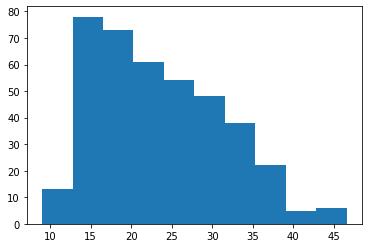

In [124]:
import matplotlib.pyplot as plt
plt.hist(auto['mpg']);

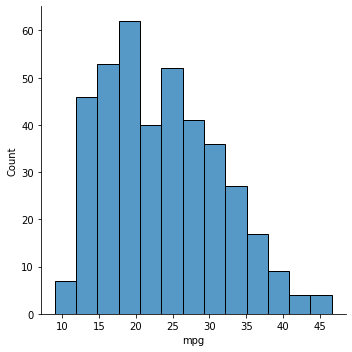

In [146]:
###Can also use sns.distplot for a different 

import seaborn as sns
sns.displot(auto["mpg"]);

The `seaborn` library has a function called `pairplot` which can be used to get a **scatter plot matrix**, which is a matrix whose diagonal elements are histograms of each column in the data and whose off-diagonal elements are scatter plots of any pair of columns in the data. A histogram is what we call a **univariate** visualization, i.e. summarizes a single variable, and a scatter plot is a **bivariate** visualization, because it shows the relationship between two variables. 

Note that for **large datasets**, plotting scatter plots is usually **not a good idea** because it can be very slow. So if the data is very large use the `sample` method to take a sample of it before you plot any scatter plots.

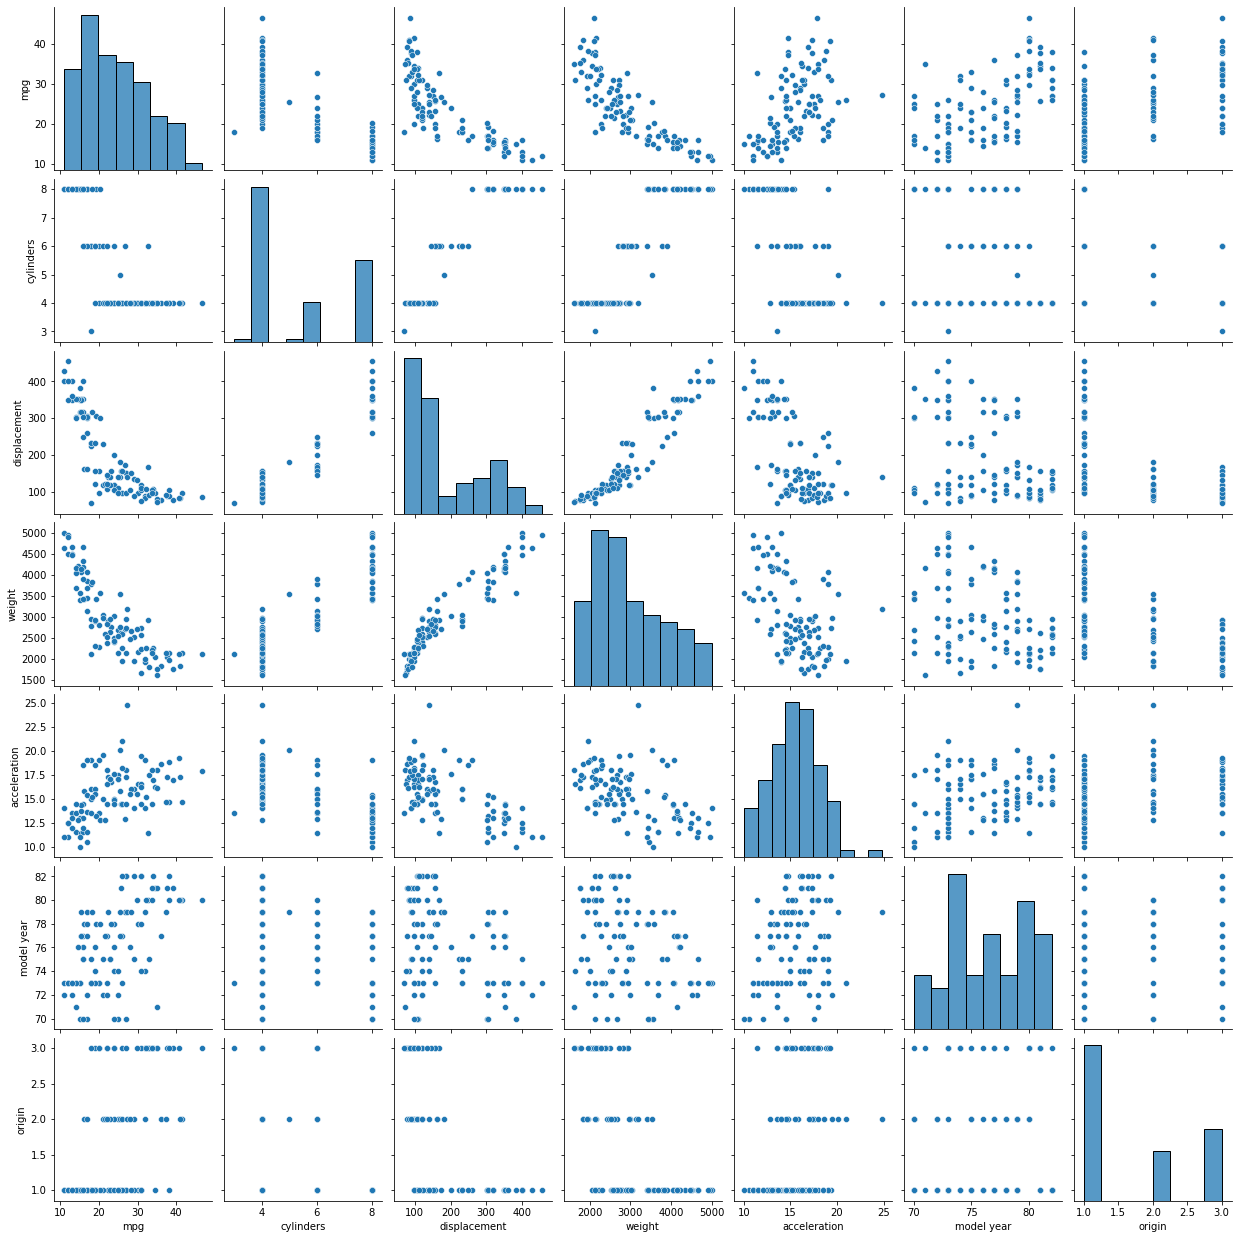

In [126]:
###Shows the different correlations between all of the columns

###Can see distribution of it

###Can also see which one you may potentially want to remove to look into seperate correlations

###If you are trying to forecast sales based on product = revenue is price * number of units sold and in features you could have all three variables and units and revenue make a highly correlated columns

###Graph can get really clustered, maybe plot only a few up front

sns.pairplot(auto.sample(100));

Similar to the scatter plot matrix, we can also show the **correlation matrix** by just calling `corr` on the `DataFrame`, which is the correlation of any pairs of numeric columns in the data.

In [148]:
###This is a good way to tell stats but not great for visualization -- good sanity check

auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


We saw earlier how we can use `loc` to subset the data. We're going to use it here again, but this time we're subsetting the data by rows that meet a certain **condition**. In this case, the condition is `auto['horsepower'] == '?'`, which means cases where `horsepower` is the string `?`.

In [128]:
hp_na = auto['horsepower'] == '?'
wt_gt_2500 = auto['weight'] > 2500
auto.loc[hp_na & wt_gt_2500, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


We can add additional conditions, but need to wrap each condition in parentheses and separate them by and (`&`) and or (`|`). Here is an example:

In [129]:
auto.loc[(auto['horsepower'] == '?') & (auto['acceleration'] > 17)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


At some point, with lots of conditions, the code starts to look nasty, so it's good to refactor it to make it more readable:

In [130]:
hp_missing = auto['horsepower'] == '?'
acc_gt_17 = auto['acceleration'] > 17
auto.loc[hp_missing & acc_gt_17] # the parenthesis are not needed anymore

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [150]:
auto['horsepower']== '?'

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

We can use `~` to negate a condition.

In [151]:
auto.loc[hp_missing & ~acc_gt_17]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i


### Exercise (4 minutes)

- Try to plot the distribution of `horsepower`. Are you getting an error? There's a good reason: as we saw earlier, some of the rows have the string `?` for `horsepower`. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '?'

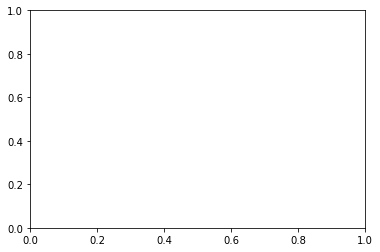

In [133]:
sns.distplot(auto["horsepower"])

(array([55., 78., 50., 71., 23., 41., 26., 20., 16., 18.]),
 array([ 0. ,  9.3, 18.6, 27.9, 37.2, 46.5, 55.8, 65.1, 74.4, 83.7, 93. ]),
 <a list of 10 Patch objects>)

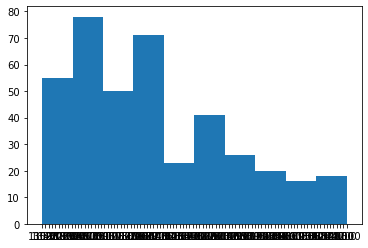

In [152]:
###if there are text values it will error for sns but 

plt.hist(auto['horsepower'])

We can use the function `pd.to_numeric` to convert a string or categorical column into numeric (pay attention to the `errors` argument).

- Convert `horsepower` to type `numeric` and then plot its distribution.

In [135]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car_name         object
dtype: object

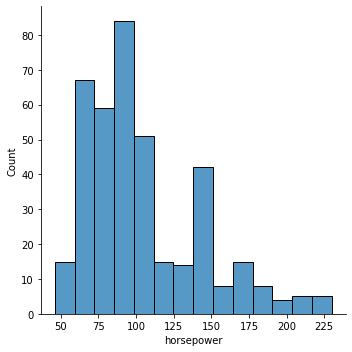

In [153]:
#auto['horsepower']=auto.horsepower.astype(float)
#auto['horsepower']=pd.to_numeric(auto.horsepower)
###Easy way to fix it is to just coerce - basically just deal with the data and not worry about, converts it to 'NaN' data
sns.displot(pd.to_numeric(auto['horsepower'], errors='coerce'))

### End of exercise

We saw that `horsepower` has missing values, although the data uses the string `?` to mark them as missing. This is not a good idea, because as the previous exercise showed we run into problems when we want to analyze or visualize the column. For example let's see what the average value is for `horsepower`. There are two identical ways we can get the average of a column:

- we can call the `mean` method on the column
- we can use the `mean` function in numpy

Once again, which is best is a matter of preference. Uncomment the code below and run it. You'll notice that we get an error. Note that you can use `CTRL+/` to comment and un-comment code.

In [154]:
auto['horsepower'].mean()

TypeError: Could not convert 130.0165.0150.0150.0140.0198.0220.0215.0225.0190.0170.0160.0150.0225.095.0095.0097.0085.0088.0046.0087.0090.0095.00113.090.00215.0200.0210.0193.088.0090.0095.00?100.0105.0100.088.00100.0165.0175.0153.0150.0180.0170.0175.0110.072.00100.088.0086.0090.0070.0076.0065.0069.0060.0070.0095.0080.0054.0090.0086.00165.0175.0150.0153.0150.0208.0155.0160.0190.097.00150.0130.0140.0150.0112.076.0087.0069.0086.0092.0097.0080.0088.00175.0150.0145.0137.0150.0198.0150.0158.0150.0215.0225.0175.0105.0100.0100.088.0095.0046.00150.0167.0170.0180.0100.088.0072.0094.0090.0085.00107.090.00145.0230.049.0075.0091.00112.0150.0110.0122.0180.095.00?100.0100.067.0080.0065.0075.00100.0110.0105.0140.0150.0150.0140.0150.083.0067.0078.0052.0061.0075.0075.0075.0097.0093.0067.0095.00105.072.0072.00170.0145.0150.0148.0110.0105.0110.095.00110.0110.0129.075.0083.00100.078.0096.0071.0097.0097.0070.0090.0095.0088.0098.00115.053.0086.0081.0092.0079.0083.00140.0150.0120.0152.0100.0105.081.0090.0052.0060.0070.0053.00100.078.00110.095.0071.0070.0075.0072.00102.0150.088.00108.0120.0180.0145.0130.0150.068.0080.0058.0096.0070.00145.0110.0145.0130.0110.0105.0100.098.00180.0170.0190.0149.078.0088.0075.0089.0063.0083.0067.0078.0097.00110.0110.048.0066.0052.0070.0060.00110.0140.0139.0105.095.0085.0088.00100.090.00105.085.00110.0120.0145.0165.0139.0140.068.0095.0097.0075.0095.00105.085.0097.00103.0125.0115.0133.071.0068.00115.085.0088.0090.00110.0130.0129.0138.0135.0155.0142.0125.0150.071.0065.0080.0080.0077.00125.071.0090.0070.0070.0065.0069.0090.00115.0115.090.0076.0060.0070.0065.0090.0088.0090.0090.0078.0090.0075.0092.0075.0065.00105.065.0048.0048.0067.0067.0067.00?67.0062.00132.0100.088.00?72.0084.0084.0092.00110.084.0058.0064.0060.0067.0065.0062.0068.0063.0065.0065.0074.00?75.0075.00100.074.0080.0076.00116.0120.0110.0105.088.0085.0088.0088.0088.0085.0084.0090.0092.00?74.0068.0068.0063.0070.0088.0075.0070.0067.0067.0067.00110.085.0092.00112.096.0084.0090.0086.0052.0084.0079.0082.00 to numeric

In [ ]:
import numpy as np
# np.mean(auto['horsepower'])

So we need to to convert `horsepower` to numeric so that we can get the average. We saw one way of doing that using `pd.to_numeric`: 

In [155]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors = "coerce")

But what exactly happened to the rows where `horsepower` is `?`? They were converted into `NaN` which stands for "Not a Number". It is similar to null values in SQL tables. We can use the `isnull` method to find rows with missing values, which works with both numeric and categorical columns.

In [156]:
auto.loc[auto['horsepower'].isnull(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


Now let's get the average and the median for `horsepower`.

In [157]:
###Will skip over the NaN values and get the mean

###One of approaches is to simply do to numeric value and it will convert all text into NaN and then you can deal with the NaN values as you see fit

auto['horsepower'].mean()

104.46938775510205

In [159]:
auto['horsepower'].median() # the median is the "middle value" if we sort the data

93.5

Many machine learning algorithms do not like missing values. Se we need to deal with the missing values prior to passing the data to the ML algorithm. There are two main ways we can do so: drop them from the data, or impute the missing values.

Dropping is a **conservative** approach and not recommended if the data is small (we later learn that how small depends partly on what ML algorithm we use).

In [160]:
auto_nona = auto.dropna() # this is how we drop any rows with nulls
auto_nona.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Exercise (4 minutes)

Instead of dropping rows where **any** column is missing, we can drop rows where **certain** columns are missing. 

- Examine `dropna` and see how you can modify it so you drop only the rows for where `horsepower` **and** `displacement` are missing (notice that we said **and**, not **or**).

In [166]:
###Way to specify subset of columns

auto.dropna(subset=['horsepower','displacement'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


Instead of dropping the missing values, we can **impute** them: By imputing, we mean replacing the missing values with something that makes sense. Imputation is a more reasonable approach that just dropping missing values, but there is more than one way to impute missing values and we need to proceed carefully. One simple approach is to replace missing values for each column with the mean or median for that column, or the "mode" for categorical columns.

- Replace the missing values for `horsepower` with the median value. HINT: 
  - You use `isnull` to find out if `horsepower` is missing.
  - You use `loc` to find the subset of the data where `horsepower` is missing.
  - You use `median` to find the median value for `horsepower`.

In [ ]:
auto.loc[auto['horsepower'].isnull()]=auto['horsepower'].mean
auto.loc[auto['horsepower'].isnull()]


### End of exercise

By now you should be able to use `pandas` to do a lot of data processing, mostly using one or two lines of code. Make sure you practice the content of this notebook a few times so you're comfortable with all of it. We will return to these concepts over an over again in future lectures.

# Assignment (Milestone 1)

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../Data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

Reasoning - By using the column, dtypes, and describe calls, I will look into what their column names are, their data types, and the basic distribution with mean, std, min, etc...

In [50]:
for name in churn.columns:
    print("\n" + name)
    print(churn[name].nunique())


user_id
6182

gender
11

address
8

store_id
92587

trans_id
92587

timestamp
42

item_id
1829

quantity
44

dollar
1207


In [51]:
churn.columns

Index(['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp',
       'item_id', 'quantity', 'dollar'],
      dtype='object')

In [52]:
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

In [53]:
churn.shape

(92587, 9)

In [54]:
churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,9.258700e+04,92587.000000,9.258700e+04,9.258700e+04,92587.000000,92587.000000
mean,1.401320e+06,102603.401298,9.717424e+05,4.474077e+12,1.412434,128.271107
std,6.008630e+05,59029.511729,8.956128e+04,1.664553e+12,5.852498,359.880624
min,1.113000e+03,0.000000,8.177470e+05,2.000893e+07,1.000000,4.000000
25%,1.023039e+06,51179.500000,8.950840e+05,4.710000e+12,1.000000,40.000000
50%,1.587036e+06,102783.000000,9.700520e+05,4.710000e+12,1.000000,75.000000
75%,1.859201e+06,154066.500000,1.048670e+06,4.710000e+12,1.000000,129.000000
max,2.164175e+06,205501.000000,1.129338e+06,9.560000e+12,1200.000000,62688.000000


In [55]:
churn.corr()

,user_id,store_id,trans_id,item_id,quantity,dollar
user_id,1.000000,0.087556,0.008996,-0.005426,0.006962,0.012680
store_id,0.087556,1.000000,0.471399,0.002715,0.001796,0.013452
trans_id,0.008996,0.471399,1.000000,0.017688,0.004471,0.011078
item_id,-0.005426,0.002715,0.017688,1.000000,0.002838,-0.018232
quantity,0.006962,0.001796,0.004471,0.002838,1.000000,0.328552
dollar,0.012680,0.013452,0.011078,-0.018232,0.328552,1.000000


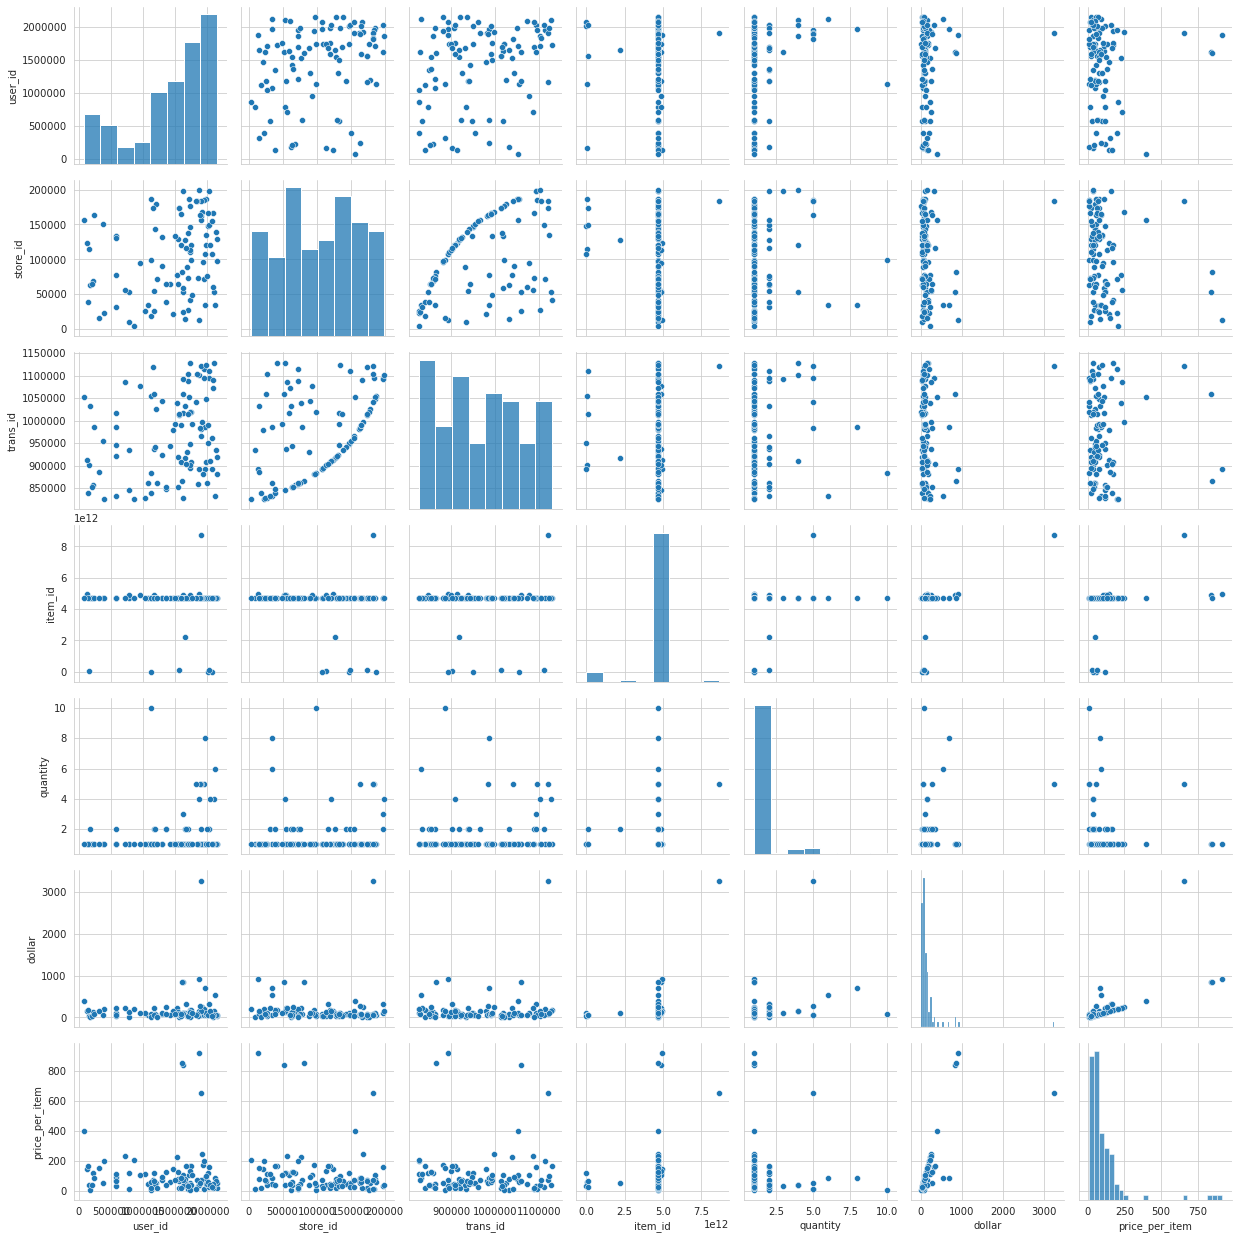

In [108]:
sns.pairplot(churn.sample(100))

Conclusion - Can see all of the columns have pretty straight forward names, the data types are a mix of objects and int though which will need to get fixed at a later step, I dont see too many issues with the quantity and dollar, there are no negative values which is nice. No major correlations that are visible to the eye with the plots or that showed any statistical significance in the correlation matrix

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

Reasoning -I want to be able to work with the item id without any floating numbers so I will convert that column, also want to make binary for gender (1 - Female, 0 - Male) and then also change the datatype for time 

In [56]:
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

In [57]:
###item id to int64
churn.astype({'item_id':'int64'}).dtypes


user_id       int64
gender       object
address      object
store_id      int64
trans_id      int64
timestamp    object
item_id       int64
quantity      int64
dollar        int64
dtype: object

In [58]:
###timestamp to datetime
churn.astype({'timestamp':'datetime64'}).dtypes

user_id               int64
gender               object
address              object
store_id              int64
trans_id              int64
timestamp    datetime64[ns]
item_id             float64
quantity              int64
dollar                int64
dtype: object

In [59]:
###gender to binary### NOT POSSIBLE, too many values
churn['gender'].unique()

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

Conclusion - Now that the item ID and timestamp are in the correct respective formats (int64, and datetime64), now we can start working with the data and doing a little analysis. Unable to do anything with the gender data, which I was hoping to - ASSUMING THAT THE DATA HAS ISSUES WITH IT DUE TO SO MANY VALUES FOR GENDER

3. Do any columns appear to have unique rows? How do we show that? <span style="color:red" float:right>[1 point]</span>

Reasoning - Can show the number of unique rows by column by using the .unique() call on the specific column - will use a for loop. Also wanted to see, for the store_id and item_id, if there were any duplicates, etc by using the nunique() call. Made a similar loop in Q1 just for basic examination but will do it here again. 

In [109]:
for i in churn.columns:
    print("unique values of " + i + " are:")
    print(churn.loc[:,i].nunique())

unique values of user_id are:
6182
unique values of gender are:
11
unique values of address are:
8
unique values of store_id are:
92587
unique values of trans_id are:
92587
unique values of timestamp are:
42
unique values of item_id are:
1829
unique values of quantity are:
44
unique values of dollar are:
1207
unique values of price_per_item are:
1360


In [61]:
###Would most likely go back to source and ask about this...kind of confusing to have 11 genders, has already been asked about on piazza

import numpy as np
churn['gender'].unique()

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

In [62]:
###Checking the number of unique values for address - messy - would also go back to source on this but it seems that its been asked about on piazza and its messy on purpose
churn['address'].unique()

array(['E', 'H', 'D', 'F', 'G', 'C', 'B', 'A'], dtype=object)

Conclusion - Nice to go through each column individually - can see that gender and address both most likely were not entered correctly, messy data. Also found out that there are 92587 different store IDs so we will not be able to group them, however, there are 1829 item ID's so it could be potentially possible to group those values. Furthermore, there are 44 quantity values which may be nice to break down and see if there are any patterns with that. 

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

Reasoning - I already converted the timestamp into a datetime column in Q1 so that part is covered but I will look at the range to find the distribution of days, will also need to find if quanity / volume are ever negative

In [63]:
###Can also use groupby.week - dt.week().mean()
#groupby(churn['timestamp'].dt.week().mean())
churn['timestamp'].describe()

count              92587
unique                42
top       11/5/2000 0:00
freq                4713
Name: timestamp, dtype: object

In [64]:
###Can see that the number of unique cells only yield the data for two months (November + December; 6 weeks to be exact) for 2000
churn['timestamp'].unique()

array(['11/1/2000 0:00', '11/2/2000 0:00', '11/3/2000 0:00',
       '11/4/2000 0:00', '11/5/2000 0:00', '11/6/2000 0:00',
       '11/7/2000 0:00', '11/8/2000 0:00', '11/9/2000 0:00',
       '11/10/2000 0:00', '11/11/2000 0:00', '11/12/2000 0:00',
       '11/13/2000 0:00', '11/14/2000 0:00', '11/15/2000 0:00',
       '11/16/2000 0:00', '11/17/2000 0:00', '11/18/2000 0:00',
       '11/19/2000 0:00', '11/20/2000 0:00', '11/21/2000 0:00',
       '11/22/2000 0:00', '11/23/2000 0:00', '11/24/2000 0:00',
       '11/25/2000 0:00', '11/26/2000 0:00', '11/27/2000 0:00',
       '11/28/2000 0:00', '11/29/2000 0:00', '11/30/2000 0:00',
       '12/1/2000 0:00', '12/2/2000 0:00', '12/3/2000 0:00',
       '12/4/2000 0:00', '12/5/2000 0:00', '12/6/2000 0:00',
       '12/7/2000 0:00', '12/8/2000 0:00', '12/9/2000 0:00',
       '12/10/2000 0:00', '12/11/2000 0:00', '12/12/2000 0:00'],
      dtype=object)

In [65]:
churn.timestamp.min()

'11/1/2000 0:00'

In [66]:
###Curious why the max date was not 12/12/2000??? Any ideas???
churn.timestamp.max()

'12/9/2000 0:00'

In [67]:
###Is quantity or volume ever negative??? Volume should be number of transactions per day
#A - Check on quantity - quantity is never negative
(churn.quantity<0).any()

False

In [68]:
#Seems that most of the transactions are 1, will investigate later - Since none of the quantities are negative then therefore the volume will never be negative
churn['quantity'].describe()

count    92587.000000
mean         1.412434
std          5.852498
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1200.000000
Name: quantity, dtype: float64

Conclusion - Found that the data was over a 6 week period from November to December of 2000 and that the quantity was never in the negatives

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

Reasoning - Think about weekly scales, first needed to set the time to an index to be able to work with on a broader scale, after setting it into index I will then sum up all of the transaction_id's and then divide by the number of weeks(6) to get a weekly average scale of transactions. Next, to get a better idea I will break it up into weeks using loc and a weekly scale (week 1 - week 6) to get a more accurate picture of the variation. I will try all three parts of this question for some extra practice.

In [69]:
###How many transactions, on average, do users have in a given week - Part 1 of Q5
churn_up = churn.set_index('timestamp')

###Divide up by weeks later if necessary, slice is inclusive of both endpoints
#weeks = churn.up['11/1/2000 0:00':'12/12/2000 0:00', 'W']
week_1=churn_up.loc['11/1/2000 0:00':'11/7/2000 0:00']
week_2=churn_up.loc['11/8/2000 0:00':'11/14/2000 0:00']
week_3=churn_up.loc['11/15/2000 0:00':'11/21/2000 0:00']
week_4=churn_up.loc['11/22/2000 0:00':'11/28/2000 0:00']
week_5=churn_up.loc['11/29/2000 0:00':'12/5/2000 0:00']
week_6=churn_up.loc['12/6/2000 0:00':'12/12/2000 0:00']

In [70]:
churn_up['trans_id'].count()/6 # Average by week of the number of transactions by users

15431.166666666666

In [80]:
###Also wanted to break it up by week to see if there was any major deviations
week_1['trans_id'].count()

16090

In [81]:
week_2['trans_id'].count()

16125

In [82]:
week_3['trans_id'].count()

12438

In [83]:
week_4['trans_id'].count()

19061

In [84]:
week_5['trans_id'].count()

15289

In [85]:
week_6['trans_id'].count()

13584

Conclusion - See a spike in transactions in week 4, overall the average is 15,431 per week. There a faster, more efficient way to check this???

Are there items that are more commonly sold in bulk (quantity greater than 1)? - Part II of Q5

Reasoning - will take a look at all of the items where quantity is > 1 and also where the quantity ==1 and look into it a little more

In [86]:
#Making a new df that has all quantities =1
Q_1 = churn_up.query('quantity == 1')
Q_1.head()

,user_id,gender,address,store_id,trans_id,item_id,quantity,dollar
timestamp,,,,,,,,
11/1/2000 0:00,101981,F,E,2860,818463,4.710000e+12,1,37
11/1/2000 0:00,101981,F,E,2861,818464,4.710000e+12,1,17
11/1/2000 0:00,101981,F,E,2862,818465,4.710000e+12,1,23
11/1/2000 0:00,101981,F,E,2863,818466,4.710000e+12,1,41
11/1/2000 0:00,101981,F,E,2866,818472,4.710000e+12,1,27


In [87]:
Q_1.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,7.295600e+04,72956.000000,7.295600e+04,7.295600e+04,72956.0,72956.000000
mean,1.405154e+06,102077.440868,9.715329e+05,4.462563e+12,1.0,104.078897
std,5.992656e+05,59054.777310,8.976319e+04,1.691715e+12,0.0,175.654623
min,1.113000e+03,0.000000,8.177470e+05,2.000893e+07,1.0,4.000000
25%,1.029048e+06,50796.750000,8.948120e+05,4.710000e+12,1.0,39.000000
50%,1.588255e+06,102177.500000,9.690140e+05,4.710000e+12,1.0,68.000000
75%,1.860528e+06,153199.250000,1.048863e+06,4.710000e+12,1.0,113.000000
max,2.164175e+06,205486.000000,1.129338e+06,9.560000e+12,1.0,5400.000000


In [88]:
#Making a new df that has all quantities greater than 1
Q_greater = churn_up.query('quantity > 1')
Q_greater.head()

,user_id,gender,address,store_id,trans_id,item_id,quantity,dollar
timestamp,,,,,,,,
11/1/2000 0:00,101981,F,E,2864,818467,4.710000e+12,8,288
11/1/2000 0:00,101981,F,E,2865,818471,4.710000e+12,2,34
11/1/2000 0:00,101981,F,E,2868,818476,4.710000e+12,2,60
11/1/2000 0:00,101981,F,E,2872,818490,4.710000e+12,2,110
11/1/2000 0:00,101981,F,E,2873,818491,8.800000e+12,4,208


In [89]:
Q_greater.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,1.963100e+04,19631.000000,1.963100e+04,1.963100e+04,19631.000000,19631.000000
mean,1.387074e+06,104558.063267,9.725212e+05,4.516869e+12,2.945189,218.178239
std,6.065660e+05,58895.871351,8.880483e+04,1.558765e+12,12.592401,697.087093
min,1.113000e+03,3.000000,8.177650e+05,2.006212e+07,2.000000,8.000000
25%,9.872650e+05,53514.000000,8.960555e+05,4.710000e+12,2.000000,56.000000
50%,1.574135e+06,104872.000000,9.740410e+05,4.710000e+12,2.000000,111.000000
75%,1.849554e+06,157200.500000,1.048028e+06,4.710000e+12,3.000000,224.000000
max,2.164175e+06,205501.000000,1.129332e+06,9.560000e+12,1200.000000,62688.000000


Conclusion - can see that there was much more money invested in the quantites bought in 1 sample size. Item ID 9.560000e+12 sold the most in both large and small quantities. 

How do quantity and volume tend to change over the course of the day (hour by hour)? - Part III of Q5 - Would like to take a crack at this one, would we just want to graph how the quantity changes by the day on a plot???

###https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/
#Here for my own learning, helped me understand some of the time series practices

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

Thoughts - Saw a big spike in shopping at the end of november, possible that was black friday? Would just be an itial thought on why there was such a spike in the volume

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

Reasoning - Would have enjoyed to work with the gender data a little bit, see if 'M' or 'F' purchased more, or bought items that were in higher quantities, etc... Examples below. Also want to see what happens for the price, have quantity and dollar but not how much each item costs. Will make a new column that is the price per item (ASSUMING THAT THE DOLLAR IS THE TOTAL DOLLAR AMOUNT, NOT THE DOLLAR PER ITEM) - also look at the weekly scale as well

- Possible to also take a look also at the address and take a look into the data - maybe categorize it into cities / states

In [94]:
churn['price_per_item'] = churn['dollar']/churn['quantity']
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,price_per_item
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37,37.0
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17,17.0
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23,23.0
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41,41.0
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288,36.0


In [95]:
churn['gender'].unique()

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

In [96]:
###For sake of practice, F will be female and G will be male, who bought more items???
male = churn['gender']=='G'
quantity = churn['quantity']>2

male_purchase = churn.loc[male & quantity, :]

In [97]:
male_purchase.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar,price_per_item
count,4.480000e+02,448.000000,4.480000e+02,4.480000e+02,448.000000,448.000000,448.000000
mean,1.288080e+06,105803.229911,9.810759e+05,4.450817e+12,4.674107,277.439732,63.309225
std,6.189687e+05,56758.699751,8.551974e+04,1.521866e+12,2.456976,370.210190,88.005344
min,2.600000e+04,604.000000,8.180060e+05,2.024607e+07,3.000000,24.000000,7.600000
25%,8.891930e+05,67026.750000,9.185758e+05,4.710000e+12,3.000000,72.000000,19.000000
50%,1.361922e+06,97059.500000,9.817555e+05,4.710000e+12,4.000000,154.000000,38.000000
75%,1.800630e+06,158892.500000,1.062111e+06,4.710000e+12,6.000000,316.750000,74.250000
max,2.163307e+06,203048.000000,1.128766e+06,9.310000e+12,24.000000,2985.000000,995.000000


In [98]:
female = churn['gender']=='F'
quantity_f = churn['quantity']>2

female_purchase = churn.loc[female & quantity_f]

female_purchase.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar,price_per_item
count,7.770000e+02,777.000000,7.770000e+02,7.770000e+02,777.00000,777.000000,777.000000
mean,1.189001e+06,105508.782497,9.717142e+05,4.447851e+12,4.88417,318.401544,69.547666
std,6.487135e+05,56543.569151,8.550736e+04,1.695617e+12,3.93366,612.428330,114.674595
min,2.754000e+04,1989.000000,8.184670e+05,2.024828e+07,3.00000,24.000000,6.400000
25%,6.427810e+05,57456.000000,9.020960e+05,4.710000e+12,3.00000,84.000000,20.000000
50%,1.383980e+06,110013.000000,9.707610e+05,4.710000e+12,4.00000,168.000000,40.000000
75%,1.733716e+06,155672.000000,1.043634e+06,4.710000e+12,5.00000,360.000000,82.000000
max,2.164083e+06,205111.000000,1.129217e+06,9.560000e+12,44.00000,11470.000000,1699.000000


In [99]:
churn['price_per_item'].describe()


count    92587.000000
mean        98.545043
std        166.388584
min          3.666667
25%         35.000000
50%         65.000000
75%        109.000000
max       5400.000000
Name: price_per_item, dtype: float64

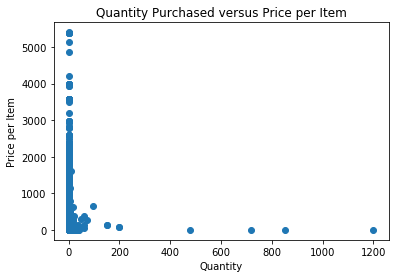

In [100]:
X = churn['quantity']
y = churn['price_per_item']
plt.xlabel('Quantity')
plt.ylabel('Price per Item')
plt.title('Quantity Purchased versus Price per Item')
plt.scatter(X, y)

Conclusion - Based on looking at the stats, females purchased, on average a higher amount with higher standard deviation - with a much higher max (44 v 24) for males. Again, dummy data but would still be interesting to look at the differences in gender and purchase history. ALso saw that females had a much higher variation for the price of the items they would purchase. Better way to visualize the price per item and quantity purchased???

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

Reasoning - To find any kind of relationships or correlations I will initially use the corr() function to take a look, investigate certain correlations after that to take a look into it, as well as take a look at the pairplot again

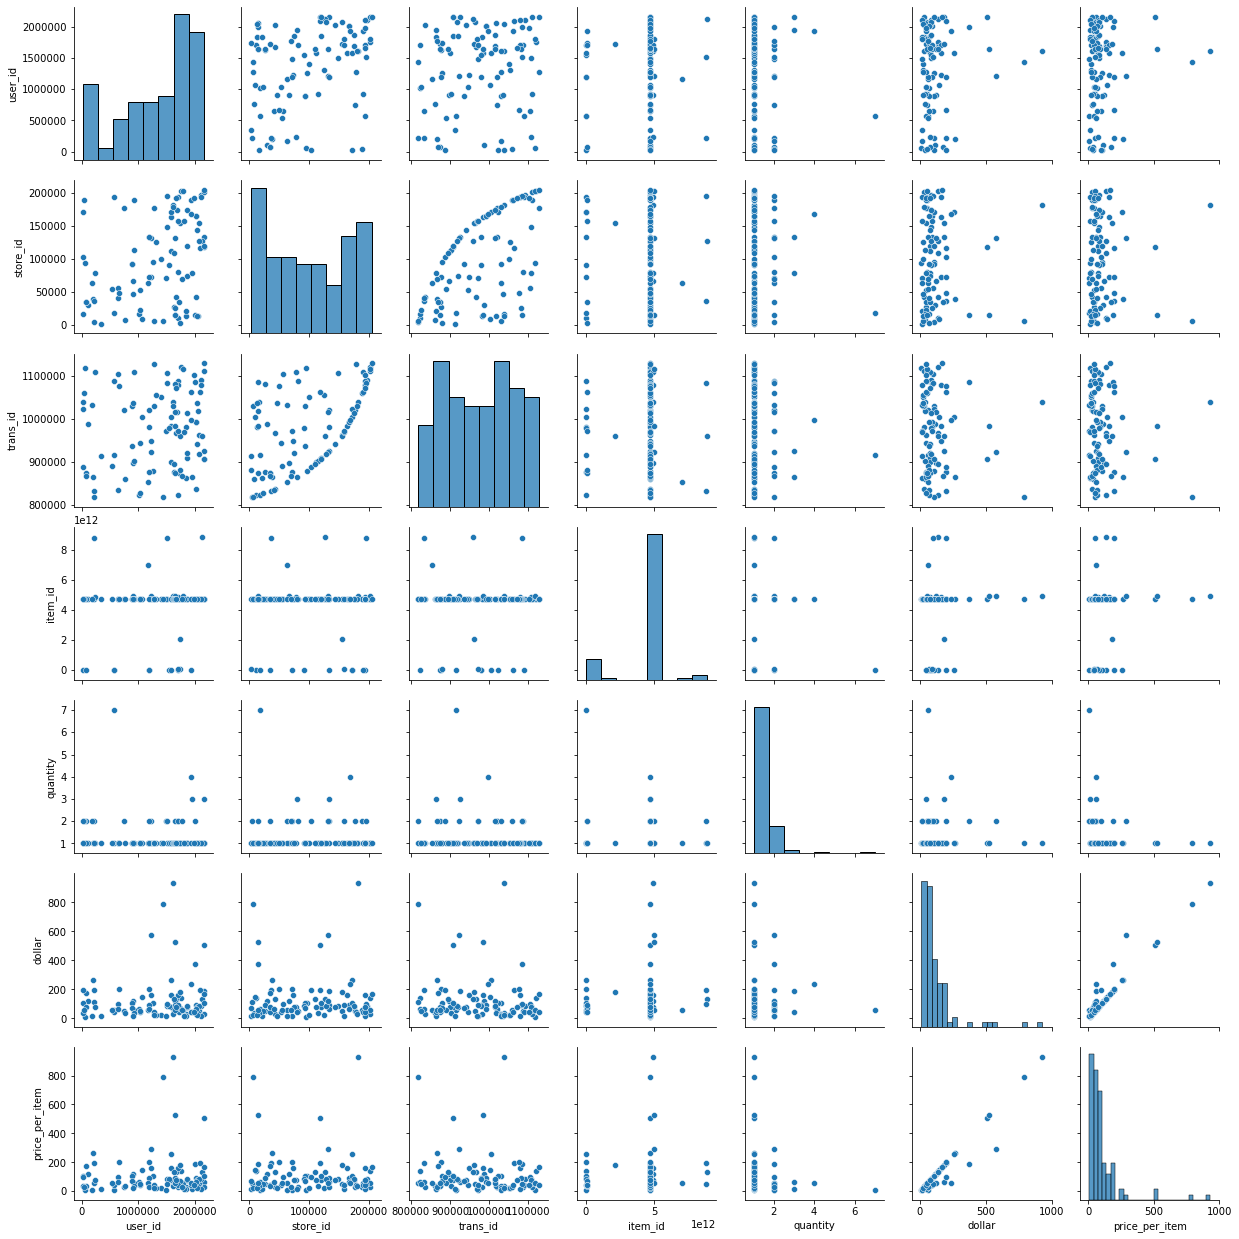

In [45]:
sns.pairplot(churn.sample(100))

In [102]:
churn.corr()

,user_id,store_id,trans_id,item_id,quantity,dollar,price_per_item
user_id,1.000000,0.087556,0.008996,-0.005426,0.006962,0.012680,0.005492
store_id,0.087556,1.000000,0.471399,0.002715,0.001796,0.013452,0.017972
trans_id,0.008996,0.471399,1.000000,0.017688,0.004471,0.011078,0.010108
item_id,-0.005426,0.002715,0.017688,1.000000,0.002838,-0.018232,-0.061661
quantity,0.006962,0.001796,0.004471,0.002838,1.000000,0.328552,-0.011211
dollar,0.012680,0.013452,0.011078,-0.018232,0.328552,1.000000,0.540408
price_per_item,0.005492,0.017972,0.010108,-0.061661,-0.011211,0.540408,1.000000


Not sure what entires describes a relationship (will investigate columns with greater than 0.5). I would like to look into the price and dollar (total amount) a little more, as well as the trans_id and store_id - seems that more items are sold at particular stores

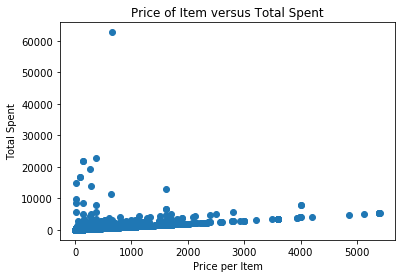

In [103]:
X = churn['price_per_item']
y = churn['dollar']
plt.xlabel('Price per Item')
plt.ylabel('Total Spent')
plt.title('Price of Item versus Total Spent')
plt.scatter(X, y)

Can see an outlier, would want to go back to source to see if that is accurate or not, if it is not accurate it would most likely increase the correlation significantly. Instance where I would contact the source of the data and confirm *** Made another plot underneath with a correlation line on the graph and a little spruced up using seaborn

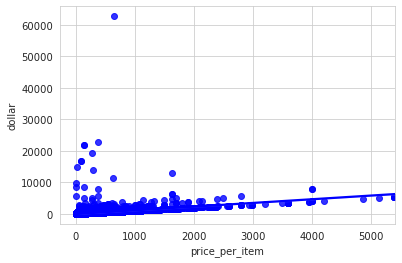

In [104]:
from scipy import stats
sns.set_style('whitegrid')
slope, intercept, r_value, p_value, std_err = stats.linregress(churn['price_per_item'],churn['dollar'])
ax = sns.regplot(x = 'price_per_item', y='dollar', data=churn, color='b', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend
plt.show()

Conclusion - Found an outlier which will affect the correlation, makes it tricky to see what the actual correlation actually is. Interesting to see the amount of items being purchased decreases significantly

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

# End of assignment